## **Linear Regression:** *Student achievement in secondary education of two Portuguese schools.*

### Required Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Importing the dataset

In [63]:
# Load the dataset
sdata = pd.read_csv('student-por.csv')
sdata.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


## Data Preprocessing:
### *Handle Missing Values*

In [64]:
# Check for missing values
print(sdata.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


### *Encoding categorical variables*

In [65]:
# Convert categorical variables into a new binary column using one-hot encoding
sdata_encoded = pd.get_dummies(sdata, drop_first=True)

### *Outliers*

In [66]:
# Calculate Z-scores for all columns (numeric and one-hot encoded)
z_scores = np.abs((sdata_encoded - sdata_encoded.mean()) / sdata_encoded.std())

# Display the first 10 rows of Z-scores
z_scores.head(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,1.030900,1.309206,1.539528,0.576274,0.083588,0.374017,0.072550,0.171514,0.693250,0.543136,...,0.652470,0.259481,2.920779,1.258258,0.252658,0.970392,0.495281,0.344648,1.814644,0.762908
1,0.209975,1.335010,1.187916,0.759446,0.083588,0.374017,1.118885,0.171514,0.157259,0.543136,...,1.530277,0.259481,0.341847,0.793525,0.252658,0.970392,2.015947,0.344648,0.550223,0.762908
2,1.431876,1.335010,1.187916,0.759446,0.083588,0.374017,0.072550,0.171514,1.007768,0.538138,...,0.652470,0.259481,2.920779,1.258258,0.252658,0.970392,0.495281,0.344648,0.550223,0.762908
3,1.431876,1.309206,0.278768,0.759446,1.289120,0.374017,0.973785,1.122905,1.007768,0.543136,...,0.652470,0.259481,0.341847,0.793525,0.252658,1.028924,0.495281,0.344648,0.550223,1.308754
4,0.610951,0.427801,0.630380,0.759446,0.083588,0.374017,0.072550,0.171514,1.007768,0.543136,...,1.530277,0.259481,0.341847,0.793525,0.252658,0.970392,0.495281,0.344648,1.814644,0.762908
5,0.610951,1.309206,0.630380,0.759446,0.083588,0.374017,1.118885,0.779877,1.007768,0.543136,...,0.652470,0.259481,0.341847,0.793525,0.252658,1.028924,0.495281,0.344648,0.550223,0.762908
6,0.610951,0.453605,0.278768,0.759446,0.083588,0.374017,0.072550,0.779877,0.693250,0.543136,...,0.652470,0.259481,0.341847,1.258258,0.252658,0.970392,0.495281,0.344648,0.550223,0.762908
7,0.209975,1.309206,1.539528,0.576274,0.083588,0.374017,0.072550,2.074296,0.693250,0.543136,...,0.652470,0.259481,2.920779,0.793525,0.252658,0.970392,0.495281,0.344648,1.814644,0.762908
8,1.431876,0.427801,0.278768,0.759446,0.083588,0.374017,0.072550,1.122905,1.007768,0.543136,...,0.652470,0.259481,0.341847,0.793525,0.252658,0.970392,0.495281,0.344648,0.550223,0.762908
9,1.431876,0.427801,1.539528,0.759446,0.083588,0.374017,1.118885,1.731268,1.858278,0.543136,...,0.652470,0.259481,0.341847,0.793525,0.252658,1.028924,0.495281,0.344648,0.550223,0.762908


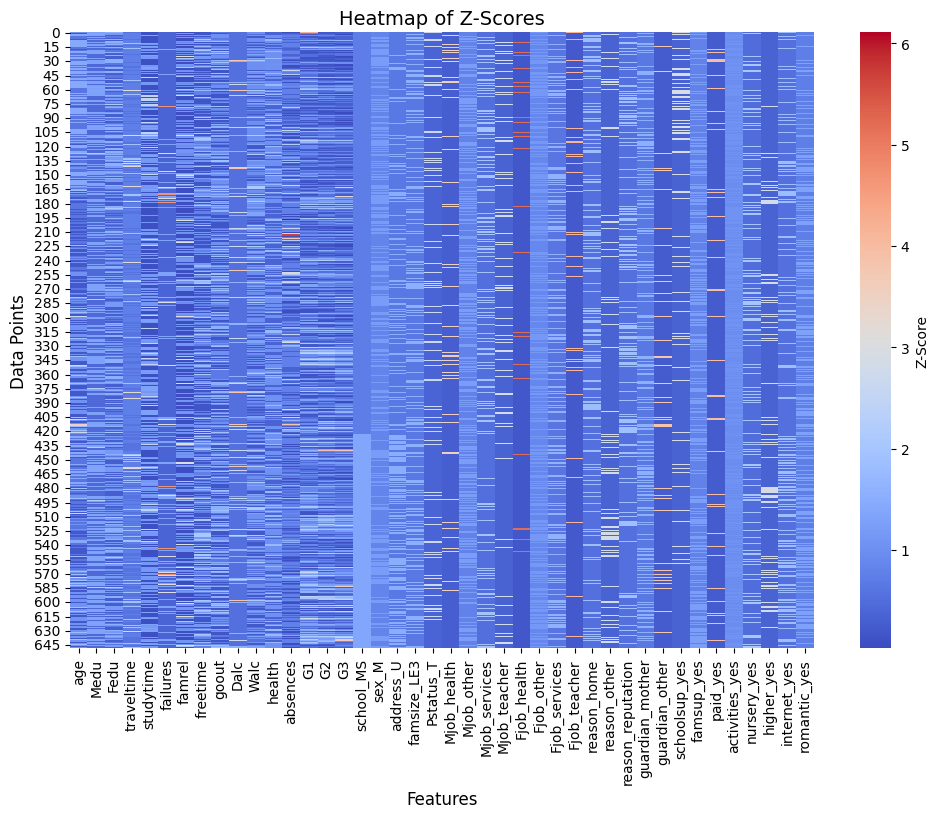

In [67]:
# Heatmap of Z-scores to identify outliers
plt.figure(figsize=(12, 8))
sns.heatmap(z_scores, cmap='coolwarm', cbar_kws={'label': 'Z-Score'})
plt.title("Heatmap of Z-Scores", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Data Points", fontsize=12)
plt.grid(False)
plt.show()


In [68]:
# Outliers based on Z-score > 3
outliers = (z_scores > 3).sum()

print("Outliers per column:\n", outliers)

# Remove rows with outliers
sdata_clean = sdata[(z_scores < 3).all(axis=1)]

Outliers per column:
 age                   3
Medu                  0
Fedu                  0
traveltime           16
studytime             0
failures             14
famrel               22
freetime              0
goout                 0
Dalc                 17
Walc                  0
health                0
absences             11
G1                    1
G2                    7
G3                   16
school_MS             0
sex_M                 0
address_U             0
famsize_LE3           0
Pstatus_T             0
Mjob_health          48
Mjob_other            0
Mjob_services         0
Mjob_teacher          0
Fjob_health          23
Fjob_other            0
Fjob_services         0
Fjob_teacher         36
reason_home           0
reason_other          0
reason_reputation     0
guardian_mother       0
guardian_other       41
schoolsup_yes         0
famsup_yes            0
paid_yes             39
activities_yes        0
nursery_yes           0
higher_yes            0
internet_yes      

## Model Implementation:

### *Getting the inputs and output*

In [69]:
# Define your target variable (continuous) and independent variables
X = sdata_encoded.drop(columns='G3')
y = sdata_encoded['G3']

In [70]:
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,0,4,3,2,2,...,True,False,True,False,False,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,False,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,True,False,False,False,False,True,False,True,True,False
645,18,3,1,1,2,0,4,3,4,1,...,True,False,False,True,False,False,True,True,True,False
646,18,1,1,2,2,0,1,1,1,1,...,True,False,False,False,False,True,True,True,False,False
647,17,3,1,2,1,0,2,4,5,3,...,True,False,False,False,False,False,False,True,True,False


In [71]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

### *Creating the Training Set and the Test Set*

In [72]:
# scikitlearn is a library
# model_selection is a module
# train_test_split is a function# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Normalize data
scaler = StandardScaler()

# Fit and transform on training data and transform on testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
X_train_scaled

array([[ 0.98793212, -0.43741772, -0.25633653, ...,  0.35125009,
         0.56919205, -0.75993921],
       [-0.62953403,  1.35013974,  1.59142265, ...,  0.35125009,
         0.56919205,  1.31589473],
       [ 0.98793212,  0.45636101, -0.25633653, ...,  0.35125009,
        -1.75687625, -0.75993921],
       ...,
       [-0.62953403,  1.35013974,  1.59142265, ...,  0.35125009,
         0.56919205, -0.75993921],
       [-1.4382671 , -1.33119645, -1.18021613, ...,  0.35125009,
         0.56919205, -0.75993921],
       [-1.4382671 ,  1.35013974,  1.59142265, ...,  0.35125009,
         0.56919205, -0.75993921]])

In [75]:
X_test_scaled

array([[ 0.98793212,  1.35013974,  1.59142265, ...,  0.35125009,
         0.56919205, -0.75993921],
       [-0.62953403,  0.45636101, -1.18021613, ...,  0.35125009,
         0.56919205, -0.75993921],
       [ 0.98793212,  1.35013974,  1.59142265, ...,  0.35125009,
         0.56919205, -0.75993921],
       ...,
       [-0.62953403,  0.45636101,  1.59142265, ...,  0.35125009,
        -1.75687625, -0.75993921],
       [ 0.17919904,  1.35013974,  0.66754306, ...,  0.35125009,
         0.56919205,  1.31589473],
       [ 0.98793212, -0.43741772, -0.25633653, ...,  0.35125009,
         0.56919205,  1.31589473]])

In [76]:
y_train

332    18
29     12
302    12
286    13
554    10
       ..
71     10
106    10
270    15
435    10
102    12
Name: G3, Length: 519, dtype: int64

In [77]:
y_test

636    19
220    12
594    18
429    11
72     11
       ..
514     7
374    17
444    11
244    12
601    10
Name: G3, Length: 130, dtype: int64

### *Building the Model*

In [78]:
# Initialize the linear regression model
model = LinearRegression()

### *Training the Model*

In [79]:
# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

### *Inference*

In [80]:
# Predict the target values for the test data
y_pred = model.predict(X_test_scaled)
y_pred

array([18.40265613, 11.82720849, 18.56288575, 10.80969554, 11.74323992,
       16.52050538, 17.68642688,  9.20547185, 10.99263829, 10.52990179,
       18.68507485, 12.01170944, 12.51636949,  9.25637135, 10.92001471,
       13.89458333, 11.70284959,  7.75525634, 15.58827334, 14.91646892,
       15.48017743, 13.6711844 , 14.51763488, 12.14228197, 14.73663429,
       12.89956801,  8.386953  , 11.70486551, 11.30482308, 15.39946248,
       15.91856938, 13.007757  ,  7.94478881,  6.55967433, 17.82710293,
       15.76901234, 14.0460542 , 15.54431689, 13.26315587, 11.43204987,
       13.88933129, 11.05736646,  8.62073014, 11.85157458, 13.27989252,
       13.13368834, 17.89357593, 11.39508466, 12.06570598, 11.36425844,
       11.00499054, 11.16234464, 14.32597736,  9.8592132 , 10.79193041,
       18.01161782,  9.10909354, 10.35558102, 11.4316307 , 10.04193231,
        8.21272376, 11.30013557, 16.13851443, 12.36903381, 15.51853105,
       16.17553342,  9.9042642 ,  7.94076538,  9.50371636,  9.57

## Evaluating the Model:

### *Mean Squared Error*

In [81]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

Mean Squared Error (MSE): 1.48


### *Mean Absolute Error*

In [82]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

Mean Absolute Error (MAE): 0.77


### *R-squared*

In [83]:
# Calculate R-squared (r2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R²): {r2:.2f}")

R-squared (R²): 0.85


## Interpretation:

### *- A positive coefficient means that as the feature increases, the target variable increases.*
### *- A negative coefficient means that as the feature increases, the target variable decreases.*

In [84]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
# Print the coefficients
coefficients.head(15)

,Coefficient
age,0.007372
Medu,-0.166254
Fedu,0.041540
traveltime,0.083662
studytime,0.050082
failures,-0.124303
famrel,-0.040140
freetime,-0.113908
goout,0.020842
Dalc,-0.067851


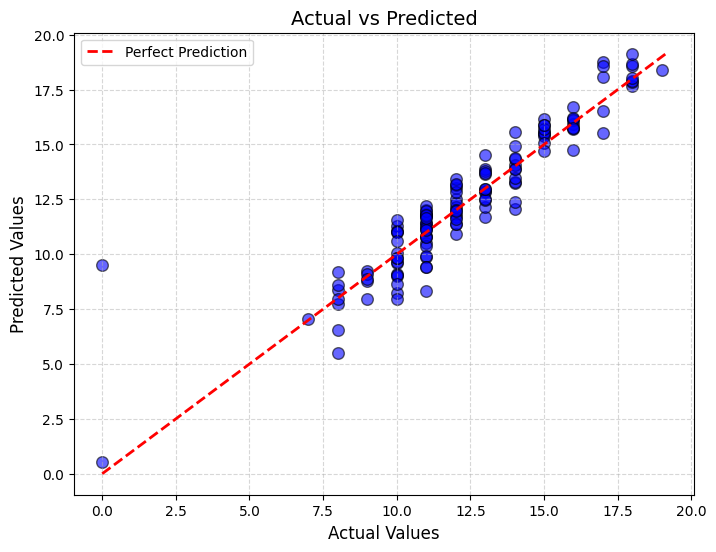

In [85]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolors='black', s=70)  # Add alpha for transparency

# Add a diagonal line representing perfect predictions
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', linewidth=2, label='Perfect Prediction')

# Set labels and title
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.title('Actual vs Predicted', fontsize=14)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Show the plot
plt.show()


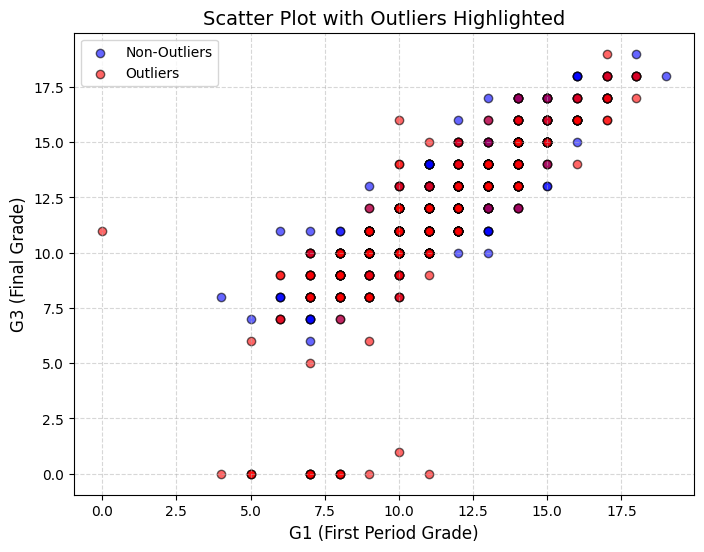

In [86]:
# Scatter plot highlighting outliers
outlier_mask = (z_scores > 3).any(axis=1)

plt.figure(figsize=(8, 6))
plt.scatter(sdata_clean['G1'], sdata_clean['G3'], alpha=0.6, color='blue', label='Non-Outliers', edgecolors='black')
plt.scatter(sdata[outlier_mask]['G1'], sdata[outlier_mask]['G3'], alpha=0.6, color='red', label='Outliers', edgecolors='black')
plt.xlabel('G1 (First Period Grade)', fontsize=12)
plt.ylabel('G3 (Final Grade)', fontsize=12)
plt.title('Scatter Plot with Outliers Highlighted', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
